In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.configreader as configreader

#main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/hydrosmotic_hydraulic/versus/N1000_hydraulic/'
main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/'
data_dir = ''

mu = (np.sin(np.pi/3.))**2 / (2*np.pi/3. - np.sin(2*np.pi/3.))

Import successful !


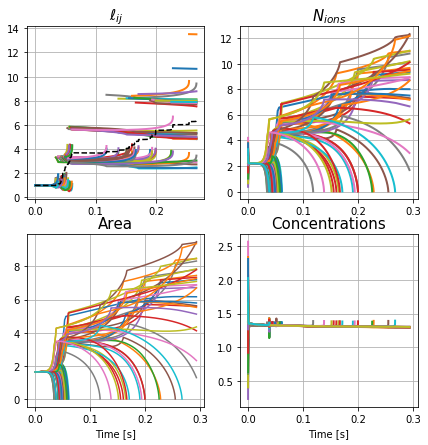

In [39]:
subdir = 'osmotic/N100/tests'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
#print(ch)
#x = np.linspace(0., ch.total_length, 1001)
#tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)





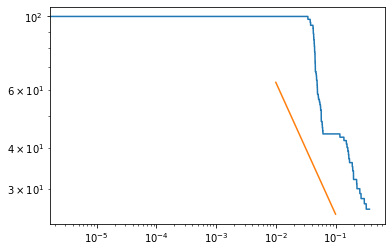

In [44]:
Nt = np.loadtxt(os.path.join(main_dir, subdir, 'sim_nlum.dat'))

plt.xscale('log')
plt.yscale('log')

plt.plot(Nt[:, 0], Nt[:, 1])

k, a = 10., -2./5
t = np.logspace(-2, -1, 101)
plt.plot(t, k*t**a)

plt.show()

In [4]:
def search_value(filename, value_name) :
    my_file = open(filename).readlines()
    for line in end_file :
        if line.find(value_name) != -1 :
            value = line.split(' ')[-1]
    return value


In [6]:
try : 
    os.mkdir(os.path.join(main_dir, 'bis'))
    os.mkdir(os.path.join(main_dir, 'bis', 'pics'))
except : pass

config = configreader.Config()
new_conf = config.read(os.path.join(main_dir, 'config.conf'))
end_file = open(os.path.join(main_dir, 'end_chain.dat')).readlines()



nb_lumens = int(search_value(os.path.join(main_dir, 'end_chain.dat'), 'Nb lumens'))

chain_type = new_conf['sim']['chain_type']
e0 = float(new_conf['sim']['e0'])
l_dis = float(new_conf['topology']['l_dis'])
l_merge = float(new_conf['topology']['l_merge'])

theta = np.pi/3.
eps = float(new_conf['topology']['eps'])
pbc = False


if chain_type == 'hydraulic' :
    new_ch = lc.Chain(nb_lumens=nb_lumens, e0 = e0, theta=theta, l_dis=l_dis, l_merge=l_merge, pbc=pbc)
elif chain_type == 'hydroosmotic' :
    new_ch = lc.Osmotic_Chain(nb_lumens=nb_lumens, e0 = e0, theta=theta, l_dis=l_dis, l_merge=l_merge, pbc=pbc)
    new_ch.xis = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'xi_s'))
    new_ch.xiv = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'xi_v'))
    new_ch.taus = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'tau_s'))
    new_ch.tauv = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'tau_v'))
    new_ch.pumping = eval(new_conf['sim']['pumping'])
    new_ch.merge = eval(new_conf['topology']['merge'])
    
new_ch.lumens_dict, new_ch.bridges_dict = {}, {}
new_ch.time = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'Current Time'))
new_ch.total_length = float(search_value(os.path.join(main_dir, 'end_chain.dat'), 'Total length'))



In [7]:
for line in end_file :
    if line.startswith('Lumen') :
        lum = line.split(' ')
        #print(lum)
        index = int(lum[1])
        init_pos = float(lum[5])
        init_length = float(lum[8])
        init_nb_ions = float(lum[10])
        ca = float(lum[14])
        new_ch.lumens_dict[index] = lc.Osmotic_Lumen(index, init_pos, init_length, init_nb_ions, theta, eps, ca)
        
for line in end_file :
    if line.startswith('Bridge') :
        bridge = line.split(' ')
        index = int(bridge[1])
        lumen1 = float(bridge[3][1:-1])
        lumen2 = float(bridge[4][:-1])
        length = float(bridge[7])
        ca = float(bridge[10])
        new_ch.bridges_dict[index] = lc.Osmotic_Bridge(index, lumen1, lumen2, length, ca)
        
        

In [8]:

chain.run(new_ch, dir_name=os.path.join(main_dir, 'bis'), max_step = 10000, savefig=True, pics_dirname=os.path.join(main_dir, 'bis', 'pics'))


Error for the total length !
40.0730542095 40.07299999999999
Error for the total length !
40.0730542095 40.073
Error for the total length !
40.0730542095 40.07300000000001
Error for the total length !
40.0730542095 40.07299999999999
Error for the total length !
40.0730542095 40.073
End simulation : 1 Lumen left


2

In [9]:
subdir = 'bis'
conf, ch = chain.load_config(os.path.join(main_dir, subdir, 'config.conf'))
print(ch)
x = np.linspace(0., ch.total_length, 1001)
tools.plot_profile(x, ch)

ell = tools.load_brfile(os.path.join(main_dir, subdir, 'sim_bridges.dat'))

x_log = 0

if ch.lumen_type == 'hydroosmotic' :
    L, nions, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=True)
    tools.plot_evolution(L, nions, ell, x_logscale=x_log)
else :
    L, pos = tools.load_file(os.path.join(main_dir, subdir, 'sim_all.dat'), hydroosmotic=False)
    tools.plot_evolution_hydraulic(L, ell, x_logscale=x_log)






FileNotFoundError: [Errno 2] No such file or directory: '/Users/mathieuleverge/git/chain_lumen/_data/10lumens/bis/config.conf'

In [25]:
print(new_ch)

======= CHAIN =======
Type         : hydroosmotic
Total length : 0
Current Time : 0.12381201298145696
Screening lengths : 
        xi_s = 186.173990674
        xi_v = 186.173990674
Permeation times :
       tau_s = 1.0
       tau_v = 1.0
Pumping : False
======= LUMENS =======
Nb lumens : 5
Lumen 0 is at position 0.00000 with length 0.00000 and 0.00000 ions with pumping 0.00000
Lumen 2 is at position 9.81000 with length 1.53891 and 3.75673 ions with pumping 0.00000
Lumen 3 is at position 13.18000 with length 1.24294 and 2.45190 ions with pumping 0.00000
Lumen 6 is at position 21.35600 with length 1.32779 and 2.79694 ions with pumping 0.00000
Lumen 7 is at position 24.80300 with length 1.27231 and 2.56845 ions with pumping 0.00000
Lumen 9 is at position 30.72700 with length 1.73460 and 4.76934 ions with pumping 0.00000
Lumen -1 is at position 40.07300 with length 0.00000 and 0.00000 ions with pumping 0.00000
======= BRIDGES ======
Bridge 2 : (2, 3) has length 0.58815 with pumping 0.00000

In [30]:
len(new_ch.rec)

0

In [ ]:
for line in end_file :
    if line.startswith('Bridge') :
        print(line)
        

In [123]:
ch.lumens_dict

{0: <_ressources.lumenclass.Osmotic_Lumen at 0x111f942d0>,
 1: <_ressources.lumenclass.Osmotic_Lumen at 0x111a6ca90>,
 2: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94310>,
 3: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94350>,
 4: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94390>,
 5: <_ressources.lumenclass.Osmotic_Lumen at 0x111f943d0>,
 6: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94410>,
 7: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94450>,
 8: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94490>,
 9: <_ressources.lumenclass.Osmotic_Lumen at 0x111f944d0>,
 10: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94510>,
 -1: <_ressources.lumenclass.Osmotic_Lumen at 0x111f94550>}

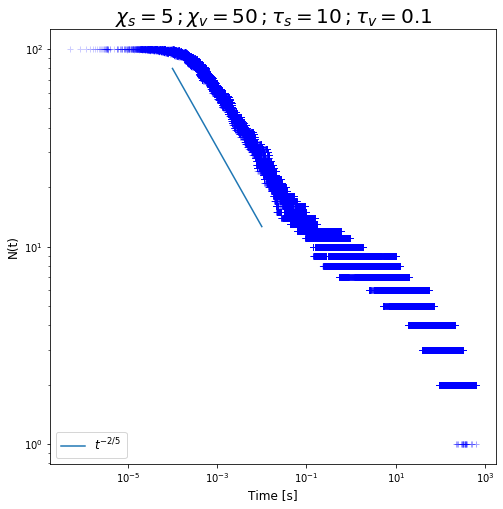

In [213]:
plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')
for i in range(20) : 
    plt.plot(Nt100_dict[i][:, 0], Nt100_dict[i][:, 1], marker='+', linewidth=0, color='b', alpha = 0.2)
    
t = np.logspace(-4, -2, 101)
k, a = 2., -2./5.
plt.plot(t, k*t**a, label='$t^{-2/5}$')


plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('N(t)', fontsize=12)
plt.legend(loc=3, fontsize=12)
plt.title(r'$\chi_s = 5 \,; \chi_v = 50 \,; \tau_s = 10 \,; \tau_v = 0.1 $', fontsize=20)
plt.show()

In [214]:
Nt100_dict = {}

for i in range(20) :
    subdir = 'osmotic/N100/largetau_chis5_chiv500/run'+str(i).zfill(4)
    Nt100_dict[i] = np.loadtxt(os.path.join(main_dir, subdir, 'sim_nlum.dat'))
    

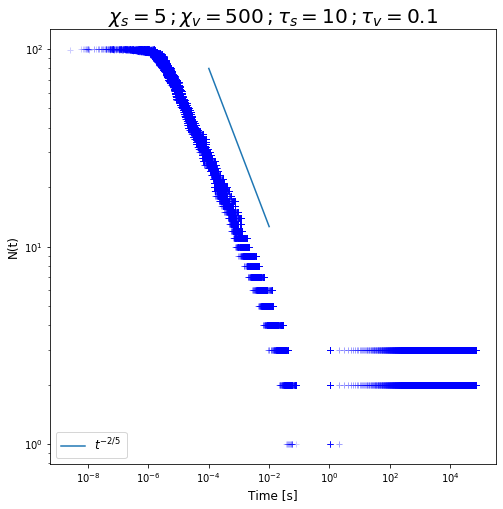

In [216]:
plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')
for i in range(20) : 
    plt.plot(Nt100_dict[i][:, 0], Nt100_dict[i][:, 1], marker='+', linewidth=0, color='b', alpha = 0.2)
    
t = np.logspace(-4, -2, 101)
k, a = 2., -2./5.
plt.plot(t, k*t**a, label='$t^{-2/5}$')


plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('N(t)', fontsize=12)
plt.legend(loc=3, fontsize=12)
plt.title(r'$\chi_s = 5 \,; \chi_v = 500 \,; \tau_s = 10 \,; \tau_v = 0.1 $', fontsize=20)
plt.show()

In [239]:

subdir = 'osmotic/N1000/ell10/large_tau/chis5_chiv500/'

NtN1000 = {}

nsim = 5
for k in range(nsim) :
    NtN1000[k] = np.loadtxt(os.path.join(main_dir, subdir, 'run'+str(k).zfill(4), 'sim_nlum.dat'))



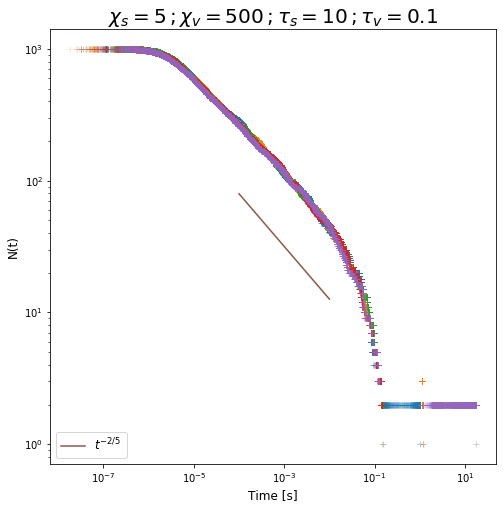

In [241]:
plt.figure(figsize=(8, 8))
plt.xscale('log')
plt.yscale('log')

for k in range(nsim) :
    plt.plot(NtN1000[k][:, 0], NtN1000[k][:, 1], marker='+', linewidth=0, alpha = 0.2)

    
t = np.logspace(-4, -2, 101)
k, a = 2., -2./5.
plt.plot(t, k*t**a, label='$t^{-2/5}$')


plt.xlabel('Time [s]', fontsize=12)
plt.ylabel('N(t)', fontsize=12)
plt.legend(loc=3, fontsize=12)
plt.title(r'$\chi_s = 5 \,; \chi_v = 500 \,; \tau_s = 10 \,; \tau_v = 0.1 $', fontsize=20)
plt.show()